In [1]:
import os
os.chdir('/home/aravinda/Desktop/MCA/data_science')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('movie_metadata.csv')
data.shape

(5043, 28)

In [3]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [15]:
newdata=data.iloc[:,4:6]
newdata.isnull().sum()
newdata.dropna(inplace=True)

In [16]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=5)

In [17]:
kmeans.fit(newdata)

/home/aravinda/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

In [19]:
print(kmeans.cluster_centers_)

[[17621.21212121   596.10606061]
 [  153.94452806   424.19264674]
 [  210.77011494 11126.43678161]
 [17545.45454545 14545.45454545]
 [12490.38461538   605.93269231]]


In [20]:
kmeans.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [21]:
unique,counts=np.unique(kmeans.labels_,return_counts=True)

In [22]:
print(dict(zip(unique,counts)))

{0: 66, 1: 4651, 2: 87, 3: 11, 4: 104}


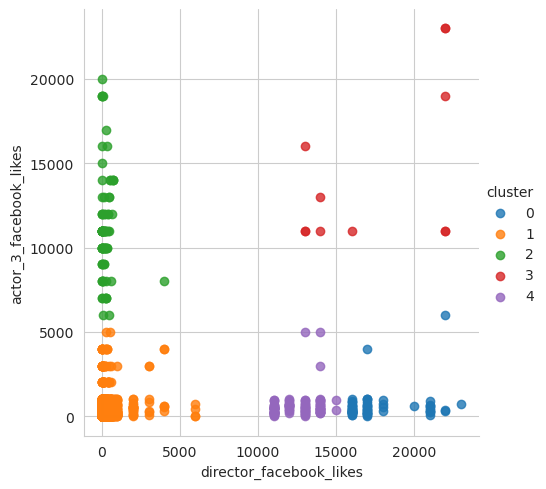

In [24]:
import seaborn as sns
newdata['cluster']=kmeans.labels_
sns.set_style('whitegrid')
sns.lmplot(x='director_facebook_likes',y='actor_3_facebook_likes',data=newdata,hue='cluster',fit_reg=False)